In [ ]:
!pip install torch torchvision


In [ ]:
!pip install tensorflow
!pip install tensorflow-object-detection-api


In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

source_images_folder = '/kaggle/input/frames'  
source_annotations_folder = '/kaggle/input/dataaaaaa/labels_my-project-name_2024-10-31-08-17-05'  
destination_folder = '/kaggle/working/dataset'  
train_ratio = 0.8  

os.makedirs(os.path.join(destination_folder, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'val/labels'), exist_ok=True)

images = sorted([f for f in os.listdir(source_images_folder) if f.endswith('.jpg')])
labels = sorted([f for f in os.listdir(source_annotations_folder) if f.endswith('.txt')])

image_names = {os.path.splitext(img)[0] for img in images}
label_names = {os.path.splitext(lbl)[0] for lbl in labels}
matched_files = image_names.intersection(label_names)

train_files, val_files = train_test_split(list(matched_files), train_size=train_ratio, random_state=42)

def move_files(file_list, split):
    for base_name in file_list:
        # Define source paths
        img_src = os.path.join(source_images_folder, f"{base_name}.jpg")
        lbl_src = os.path.join(source_annotations_folder, f"{base_name}.txt")

        # Define destination paths
        img_dest = os.path.join(destination_folder, split, 'images', f"{base_name}.jpg")
        lbl_dest = os.path.join(destination_folder, split, 'labels', f"{base_name}.txt")

        # Copy the image and label files
        shutil.copy(img_src, img_dest)
        shutil.copy(lbl_src, lbl_dest)

move_files(train_files, 'train')
move_files(val_files, 'val')

print("Dataset organized successfully.")


Dataset organized successfully.


In [13]:
!pip install ultralytics


In [15]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., YOLOv8n for Nano, YOLOv8s for Small)
model = YOLO('yolov8n.pt')  # or replace with yolov8s.pt, yolov8m.pt, etc., for different model sizes

# Train the model
model.train(data='/kaggle/input/datasetyml/dataset.yml', epochs=50, imgsz=640)


Ultralytics 8.3.26 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/datasetyml/dataset.yml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 13.9MB/s]
2024-10-31 17:57:08,880	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-31 17:57:09,924	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 61.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 985.21it/s]

train: New cache created: /kaggle/working/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/dataset/val/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1133.38it/s]

val: New cache created: /kaggle/working/dataset/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.2G      3.119      4.524      1.854        148        640: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         10        123   0.000213    0.00339    0.00011   2.19e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.22G      3.044      4.525      1.891        103        640: 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]

                   all         10        123   0.000209    0.00339   0.000107   2.14e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G      2.856      4.444      1.742        209        640: 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all         10        123   0.000189    0.00339   0.000102   4.06e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.17G      2.384      4.201       1.49        161        640: 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all         10        123   0.000523     0.0102    0.00064   0.000133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.21G      2.255      3.867      1.372        157        640: 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.23it/s]

                   all         10        123    0.00274     0.0486     0.0111    0.00302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.21G      2.199      3.314      1.286        134        640: 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all         10        123     0.0037     0.0626     0.0209    0.00539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G      2.239      3.028      1.267        153        640: 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.96it/s]

                   all         10        123    0.00928      0.179     0.0528     0.0128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G      2.261      2.657      1.294        141        640: 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]

                   all         10        123     0.0184      0.343      0.104     0.0239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G      2.259      2.572      1.291        138        640: 100%|██████████| 3/3 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

                   all         10        123     0.0249      0.374      0.153     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.2G      2.201      2.477      1.281        161        640: 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         10        123     0.0257      0.389      0.162     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.21G      2.187      2.413      1.257        124        640: 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.94it/s]

                   all         10        123     0.0284      0.547      0.173     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.22G      2.164      2.261      1.235        123        640: 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]


                   all         10        123     0.0273      0.601      0.177     0.0543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.24G      2.153      2.223       1.23        111        640: 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]

                   all         10        123     0.0288      0.649      0.208     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.15G        2.1      2.155      1.231        107        640: 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all         10        123     0.0291      0.615      0.218     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.23G      2.138      2.031      1.266        108        640: 100%|██████████| 3/3 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.78it/s]

                   all         10        123      0.782      0.125      0.239     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.2G       2.09      1.933      1.261        125        640: 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all         10        123      0.876       0.14      0.267     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.22G      2.138      1.928      1.256        140        640: 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all         10        123      0.991      0.161      0.318     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G      2.103      1.813      1.292        117        640: 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        123      0.954      0.155      0.319      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.17G      2.076      1.844       1.22         91        640: 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         10        123       0.85      0.337      0.311     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.17G      2.073      1.775       1.25        137        640: 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         10        123       0.12       0.45      0.299     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.21G       2.02      1.765      1.235        107        640: 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        123     0.0348      0.734        0.3      0.095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.16G      2.075      1.788       1.31         70        640: 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         10        123       0.13      0.404      0.324      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G      2.066      1.667      1.246        139        640: 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         10        123      0.391       0.36      0.337      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.3G      1.968      1.621      1.278         99        640: 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         10        123      0.926      0.309       0.35      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.23G      2.073      1.609      1.264        193        640: 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         10        123      0.952       0.25      0.352      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.24G      1.988      1.592      1.257        124        640: 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         10        123      0.939      0.229       0.35      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G          2      1.648      1.282         94        640: 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all         10        123      0.954       0.25      0.362      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.2G      1.951      1.531      1.218         93        640: 100%|██████████| 3/3 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.44it/s]

                   all         10        123      0.974      0.265      0.427      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.24G      1.955      1.538      1.234        174        640: 100%|██████████| 3/3 [00:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]


                   all         10        123      0.974      0.265      0.427      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.24G      2.001      1.513        1.2        176        640: 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         10        123      0.807       0.25      0.464      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.16G      2.019      1.563      1.255        120        640: 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


                   all         10        123      0.822       0.28      0.439      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.21G      1.977      1.471      1.216        155        640: 100%|██████████| 3/3 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        123      0.847      0.328      0.454      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.22G      1.999      1.489      1.286         99        640: 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all         10        123      0.847      0.328      0.454      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.21G      1.897      1.482      1.249        120        640: 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         10        123      0.866      0.375      0.512      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.24G      1.924      1.476      1.263        123        640: 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all         10        123      0.867      0.394      0.568      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.22G      1.932      1.426      1.291        119        640: 100%|██████████| 3/3 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]

                   all         10        123      0.848      0.404      0.578      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.17G      1.926      1.456      1.264         93        640: 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         10        123      0.848      0.404      0.578      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.24G      1.882      1.418      1.224        140        640: 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all         10        123      0.822      0.405      0.589      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.15G      1.867      1.437      1.218        178        640: 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


                   all         10        123      0.778        0.4      0.589      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.21G      1.931       1.49      1.299        118        640: 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all         10        123      0.713      0.485      0.615      0.265


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.19G      1.947      1.743      1.291         68        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         10        123      0.713      0.485      0.615      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.19G      1.863       1.72      1.277         81        640: 100%|██████████| 3/3 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]


                   all         10        123      0.622      0.446      0.588      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.17G      1.889      1.605      1.269         63        640: 100%|██████████| 3/3 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]

                   all         10        123      0.534      0.381      0.537      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G      1.875      1.623      1.269         64        640: 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all         10        123      0.545      0.387      0.522      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.19G      1.904      1.582      1.305         82        640: 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         10        123      0.545      0.387      0.522      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.16G      1.806      1.622      1.274         49        640: 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all         10        123      0.315      0.406      0.554      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G      1.901      1.574      1.255         76        640: 100%|██████████| 3/3 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


                   all         10        123      0.379      0.507      0.628      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.801      1.538      1.292         68        640: 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all         10        123      0.459      0.635      0.663      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.19G      1.806      1.599      1.238         51        640: 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all         10        123      0.459      0.635      0.663      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.19G      1.865       1.55      1.258         59        640: 100%|██████████| 3/3 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]

                   all         10        123      0.493      0.733      0.671      0.284



50 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.26 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]


                   all         10        123      0.495      0.738      0.673      0.283
                Team L         10         59      0.601      0.915      0.815      0.264
                Team R         10         53      0.595      0.755       0.68      0.215
          GoalKeeper_R          2          2       0.29          1      0.662      0.463
          GoalKeeper_L          4          4       0.33      0.248      0.569      0.204
               Referee          5          5      0.657      0.771      0.641      0.269
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db010158130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        


image 1/1 /kaggle/input/testimage/frame_2000.jpg: 384x640 5 Team Ls, 2 Team Rs, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


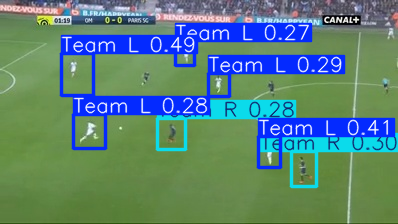

In [21]:
results = model('/kaggle/input/testimage/frame_2000.jpg')
results[0].show()  




image 1/1 /kaggle/input/testtt22/frame_33125.jpg: 384x640 1 Team L, 1 Team R, 1 GoalKeeper_R, 1 Referee, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


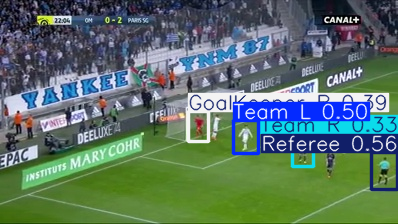

In [22]:
results = model('/kaggle/input/testtt22/frame_33125.jpg')
results[0].show()  

